In [55]:
import numpy as np
from nanowire.optics.simulate import Simulator
from nanowire.optics.utils.utils import setup_sim, get_nk
from nanowire.optics.utils.config import Config
import scipy.constants as consts
import matplotlib.pyplot as plt
plt.style.use(['paper'])
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [12]:
conf = Config('dielectric_plots.yml')
sim = Simulator(conf)
sim = setup_sim(sim)

DEBUG:nanowire.optics.simulate:Logger initialized
DEBUG:nanowire.optics.simulate:Computing up to depth of 2.0700000000000003 microns
DEBUG:nanowire.optics.simulate:Building layer: Air
DEBUG:nanowire.optics.simulate:Layer Order 1
DEBUG:nanowire.optics.simulate:Building layer: ITO
DEBUG:nanowire.optics.simulate:Layer Order 2
DEBUG:nanowire.optics.simulate:Building layer: NW_AlShell
DEBUG:nanowire.optics.simulate:Layer Order 3
DEBUG:nanowire.optics.simulate:Building geometry in layer: NW_AlShell
DEBUG:nanowire.optics.simulate:Building object shell of type circle at order 1
DEBUG:nanowire.optics.simulate:Building object core of type circle at order 2
DEBUG:nanowire.optics.simulate:Building layer: Substrate
DEBUG:nanowire.optics.simulate:Layer Order 5
DEBUG:nanowire.optics.simulate:Physical Frequency = 4.000000E+14
DEBUG:nanowire.optics.simulate:[399723277333333.31, 400256953271028.0]
DEBUG:nanowire.optics.simulate:[2.3155394055977224e-12, 2.3123628270194848e-12]
INFO:nanowire.optics.simula

{'Solver': {'DiscretizationResolution': 8, 'PolarizationDecomposition': True, 'SubpixelSmoothing': False, 'LanczosSmoothing': False, 'DiscretizedEpsilon': False, 'PolarizationBasis': 'Default', 'Verbosity': 0, 'ConserveMemory': False, 'LatticeTruncation': 'Circular'}, 'Layers': {'NW_AlShell': {'params': {'shell_radius': {'value': 0.08, 'type': 'fixed'}, 'core_radius': {'value': 0.06, 'type': 'fixed'}, 'thickness': {'value': 1.27, 'type': 'fixed'}}, 'geometry': {'core': {'material': 'GaAs', 'radius': '%(Layers.NW_AlShell.params.core_radius.value)s', 'order': 2, 'type': 'circle', 'center': {'y': '`%(Simulation.params.array_period.value)s/2`', 'x': '`%(Simulation.params.array_period.value)s/2`'}}, 'shell': {'material': 'AlInP', 'radius': '%(Layers.NW_AlShell.params.shell_radius.value)s', 'order': 1, 'type': 'circle', 'center': {'y': '`%(Simulation.params.array_period.value)s/2`', 'x': '`%(Simulation.params.array_period.value)s/2`'}}}, 'order': 3, 'base_material': 'Cyclotene'}, 'Air': {'pa

In [3]:
dielectric = sim.get_dielectric_profile()

In [5]:
dielectric = sim.data['dielectric_profile']
print(dielectric.shape)

(100, 150, 150)


[  2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377
   2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377
   2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377   2.377
   9.116   9.116   9.116   9.116   9.116   9.116   9.116   9.116   9.116
   9.116   9.116   9.116  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772  13.772
  13.772  13.772  13.772   9.116   9.116   9.116   9.116   9.116   9.116
   9.116   9.116   9.116   9.116   9.116   9.116   

/home/kyle/.virtualenvs/nanowire/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kyle/.virtualenvs/nanowire/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


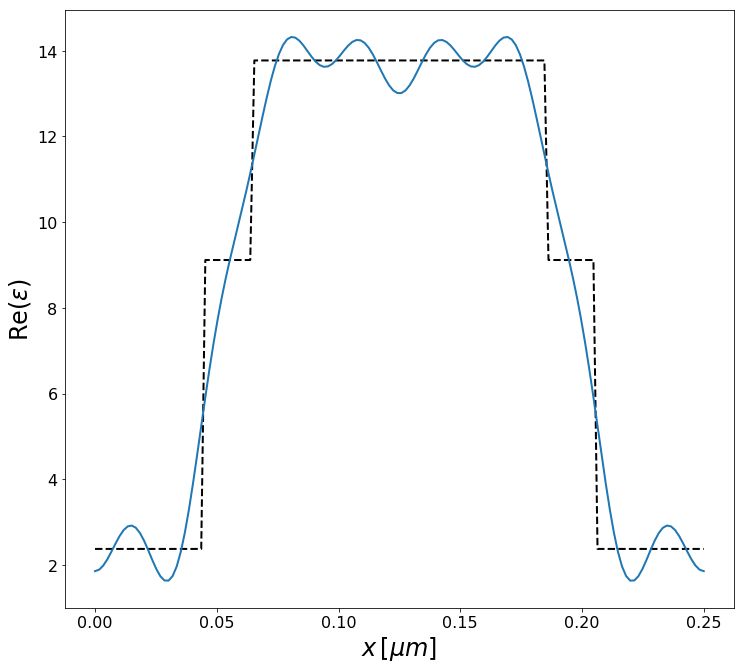

In [56]:
z_ind = np.where(sim.Z > .8)
shell_rad = sim.conf[('Layers', 'NW_AlShell', 'params', 'shell_radius', 'value')]
core_rad = sim.conf[('Layers', 'NW_AlShell', 'params', 'core_radius', 'value')]
freq = sim.conf['Simulation']['params']['frequency']['value']
gaasn, gaask = get_nk("/home/kyle/software/nanowire/nanowire/NK/006_GaAs_nk_Walker_modified_Hz.txt",
       freq)
cycn, cyck = get_nk("/home/kyle/software/nanowire/nanowire/NK/007_Cyclotrene_nk_Hz.txt",
       freq)
aln, alk = get_nk("/home/kyle/software/nanowire/nanowire/NK/009_AlInP_nk_Hz.txt",
       freq)
line_cut = dielectric[60, :, 75] 
left_cyc = .125-shell_rad
right_cyc = .125 + shell_rad
nk_arr = np.zeros(len(line_cut))
nk_arr = np.where((sim.X < left_cyc) | (sim.X > right_cyc), cycn.real**2 - cyck.real**2, nk_arr)
nk_arr = np.where((sim.X > left_cyc) & (sim.X < right_cyc), aln.real**2 - alk.real**2, nk_arr)
left_core = .125 - core_rad
right_core = .125 + core_rad
nk_arr = np.where((sim.X > left_core) & (sim.X < right_core), gaasn.real**2 - gaask.real**2, nk_arr)
print(nk_arr)
plt.figure(figsize=(12, 11))
plt.plot(sim.X, nk_arr, 'k--')
plt.plot(sim.X, line_cut)
plt.xlabel(r'$x \, [\mu m]$', fontsize=24)
plt.ylabel('$\mathrm{Re}(\epsilon)$', fontsize=24)
plt.show()